In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")

# Data Fields
datetime - hourly date + timestamp

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather

1: Clear, Few clouds, Partly cloudy, Partly cloudy 

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [3]:
train = pd.read_csv("./bike/train.csv", parse_dates = ["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test = pd.read_csv("./bike/test.csv", parse_dates = ["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [6]:
train_test_data = [train, test]

In [7]:
for dataset in train_test_data:
    dataset["year"] = dataset["datetime"].dt.year
    dataset["month"] = dataset["datetime"].dt.month
    dataset["day"] = dataset["datetime"].dt.day
    dataset["hour"] = dataset["datetime"].dt.hour
    dataset["minute"] = dataset["datetime"].dt.minute
    dataset["second"] = dataset["datetime"].dt.second
    dataset["dayofweek"] = dataset["datetime"].dt.dayofweek

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


## 데이터 시각화

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


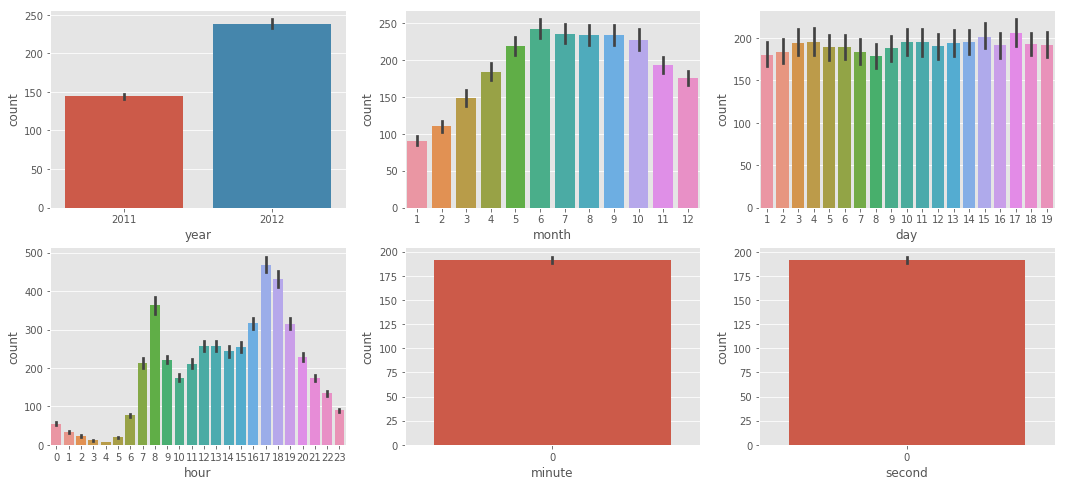

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)
fig.set_size_inches(18, 8)
columns = [["year", "month", "day"], ["hour", "minute", "second"]]
for i, col in enumerate(columns):
    for j, c in enumerate(col):
        sns.barplot(data = train, y = "count", x = c, ax = axes[i][j])
plt.show()

* 연도별 대여량은 2011년보다 2012년이 많다
* 월별 대여량은 6월에 가장 많고 7 ~ 10월에 많다. 1월은 가장 적다.
* 일별 대여량은 1~19일까지만 있고 나머지는 test데이터에 있다. feature로 사용X
* 시간 대여량은 출퇴근 시간에 대여량이 가장 많다.
* 분, 초도 다 0이기에 의미 없다.

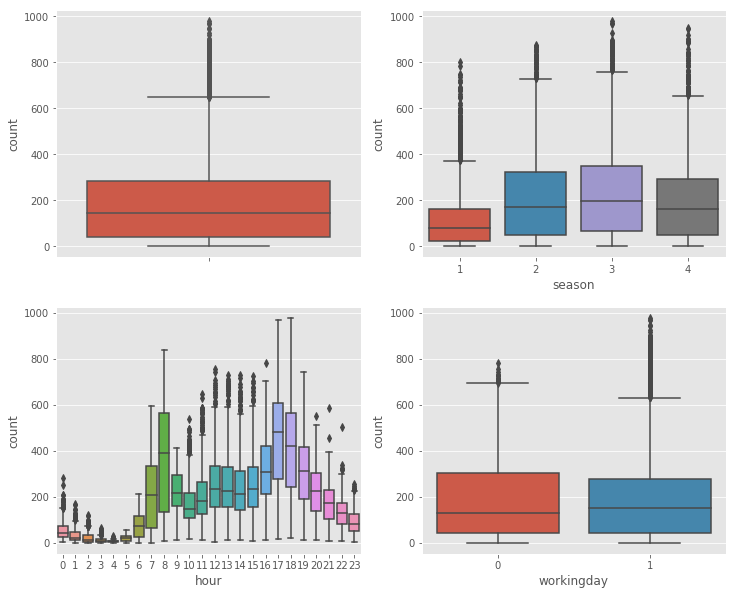

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12, 10)
columns = [[None, "season"], ["hour", "workingday"]]
for i, column in enumerate(columns):
    for j, col in enumerate(column):
        sns.boxplot(data = train, x = col, y = "count", ax = axes[i][j])
plt.show()

In [11]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

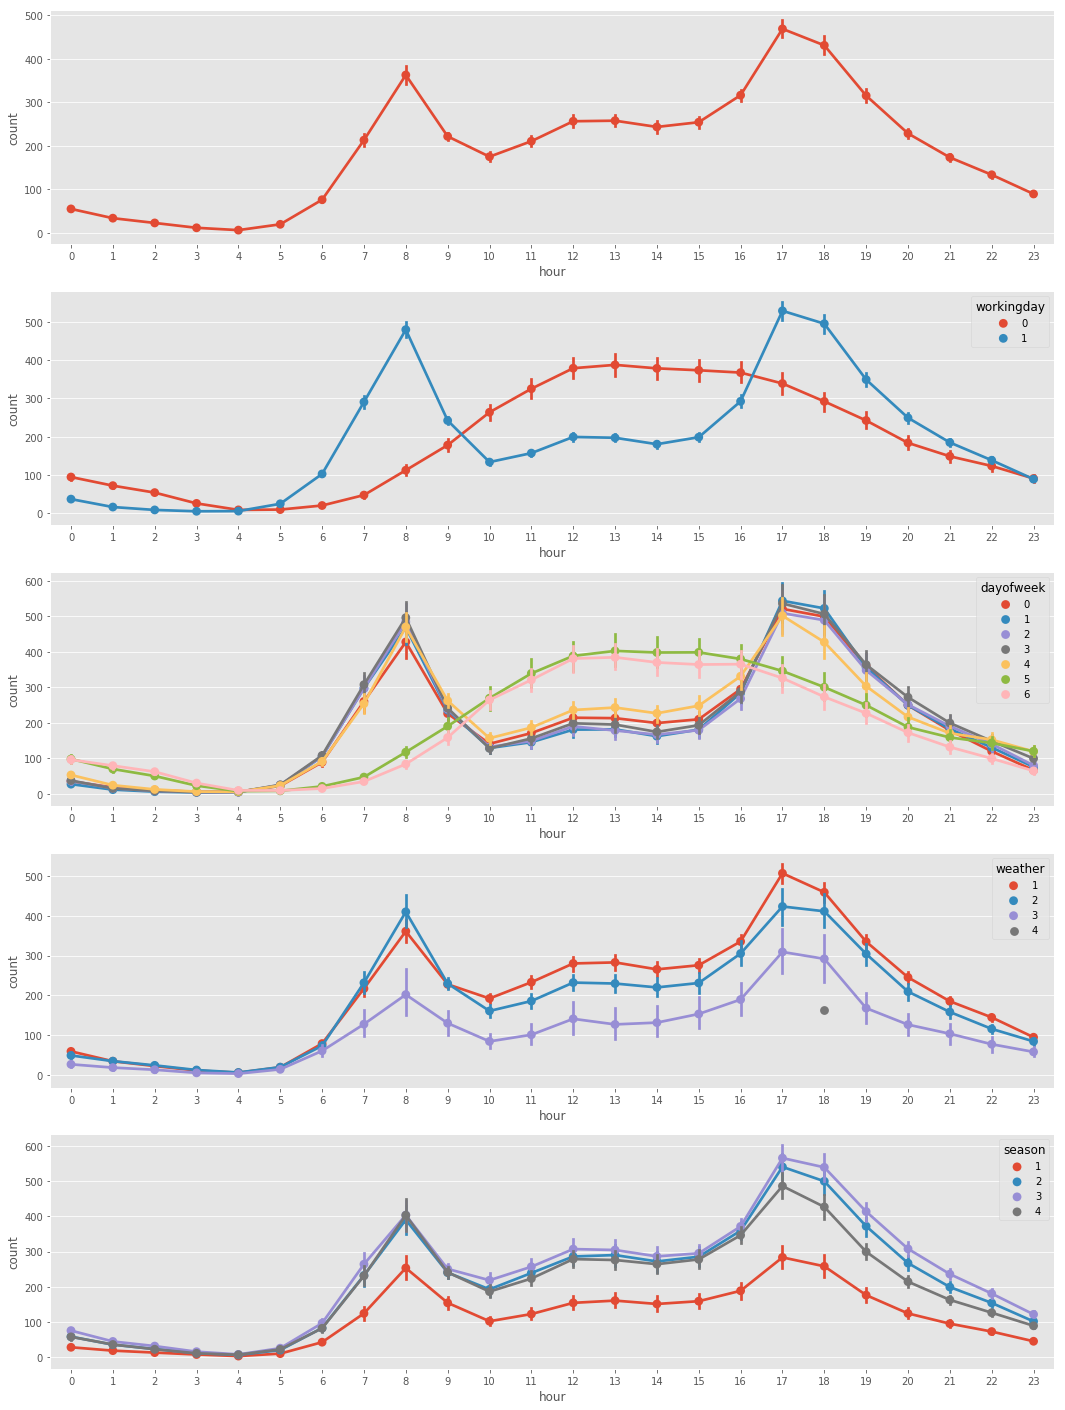

In [12]:
fig, axes = plt.subplots(nrows=5)
fig.set_size_inches(18, 25)
huelist = [None, "workingday", "dayofweek", "weather", "season"]
for i, h in enumerate(huelist):
    sns.pointplot(data = train, x = "hour", y = "count", hue = h, ax = axes[i])
plt.show()

In [13]:
corrMatt = train[["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

                temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   

               count  
temp        0.394454  
atemp       0.389784  
humidity   -0.317371  
windspeed   0.101369  
casual      0.690414  
registered  0.970948  
count       1.000000  


In [14]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
mask

array([[ 0.        ,  0.98494811, -0.06494877, -0.01785201,  0.46709706,
         0.31857128,  0.39445364],
       [ 0.        ,  0.        , -0.04353571, -0.057473  ,  0.46206654,
         0.31463539,  0.38978444],
       [ 0.        ,  0.        ,  0.        , -0.31860699, -0.3481869 ,
        -0.26545787, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.09227619,
         0.09105166,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.49724969,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

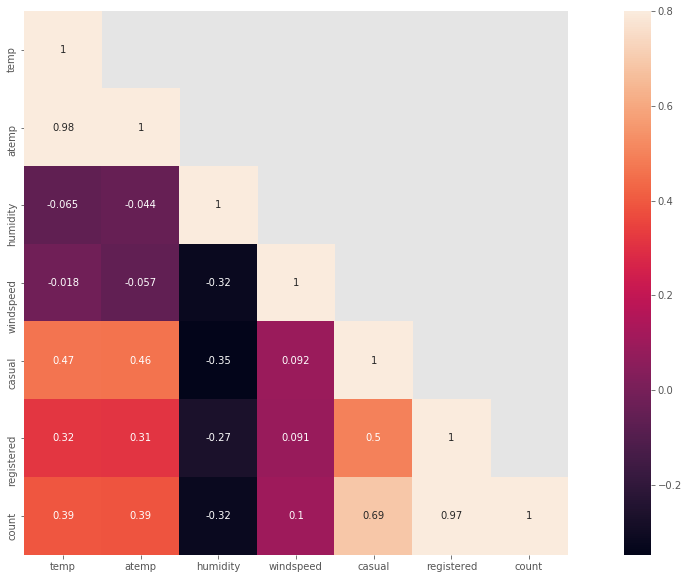

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(corrMatt,mask = mask, vmax = 0.8, square = True, annot = True)
plt.show()

* 온도, 습도, 풍속은 거의 연관관계가 없다.
* 대여량과 가장 연관이 높은 건 registered로 등록된 대여자가 많지만, test데이터에는 이 값이 없다.
* atemp, temp는 0.98로 상관관계가 높지만 온도와 체감온도로 feature로 사용하기에는 적합하지 않다.

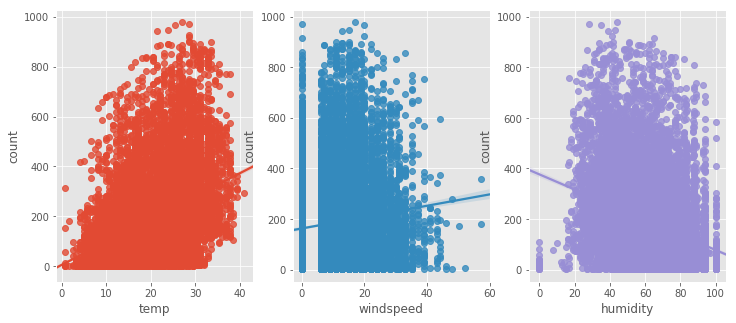

In [16]:
fig, axes = plt.subplots(ncols = 3)
fig.set_size_inches(12, 5)
xlist = ["temp", "windspeed", "humidity"]
for i, x in enumerate(xlist):
    sns.regplot(x = x, y = "count", data = train, ax = axes[i])
plt.show()

* 풍속의 경우 0에 숫자가 몰려있는것으로 보인다. 아마 관측되지 않은 수치에 대해 0으로 기록된듯하다.

In [17]:
#연도와 월을 concat시킴
train["year_month"] = train["datetime"].apply(lambda x : "{}-{}".format(x.year, x.month))
train[["datetime", "year_month"]].head()

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


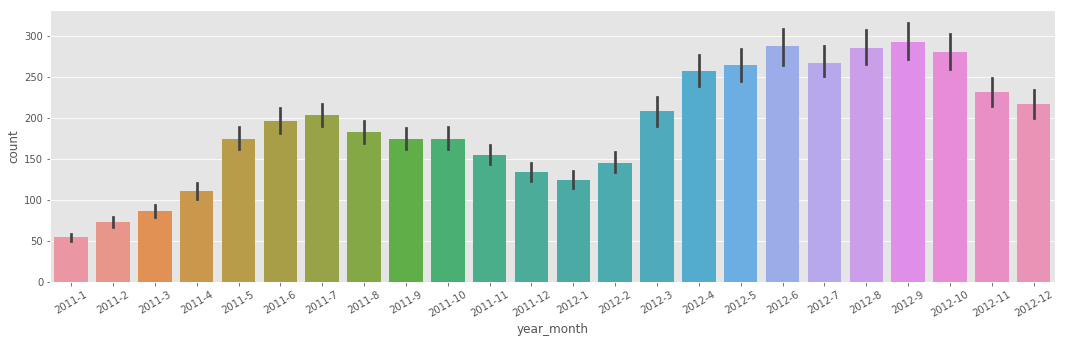

In [18]:
plt.figure(figsize = (18, 5))
sns.barplot(data = train, x = "year_month", y = "count")
plt.xticks(rotation = 30)
plt.show()

* 2011년보다 2012년의 대여량이 더 많다.
* 겨울보다 여름에 대여량이 더 많다.
* 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다

In [19]:
#이상치값 제거하기
trainWithoutOutliers = train[np.abs((train["count"] - train["count"].mean()) <= (3 * train["count"].std()))]
train.shape, trainWithoutOutliers.shape

((10886, 20), (10739, 20))

In [20]:
from scipy import stats

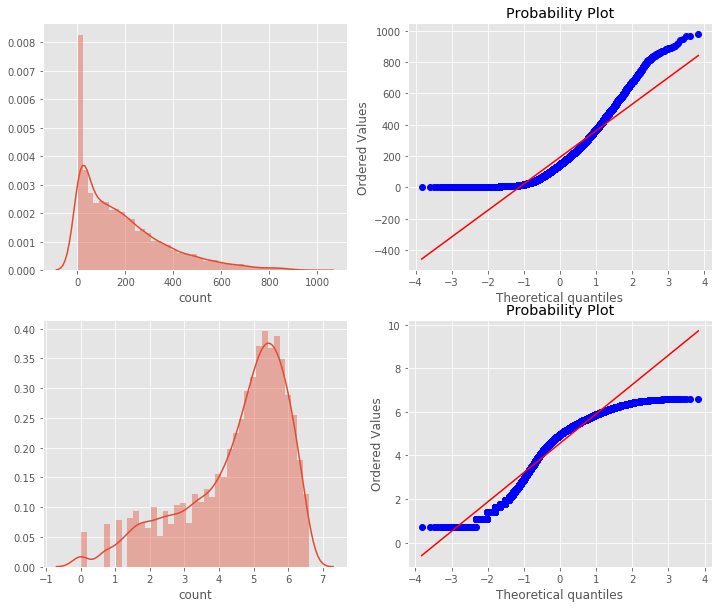

In [21]:
fig, axes = plt.subplots(ncols = 2, nrows = 2)
fig.set_size_inches(12, 10)
sns.distplot(train["count"], ax = axes[0][0])
stats.probplot(train["count"], dist = "norm", fit = True, plot = axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax = axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist = "norm", fit = True, plot = axes[1][1])
plt.show()

count 변수가 오른쪽으로 치우쳐져있다. 대부분의 기계학습은 종속변수가 normal이어야 하기에 정규분포를 갖는 것이 바람직하다
대안으로 outlier data를 제거하고 count변수에 log를 씌워 변경해 봐도 정규분포는 아니지만 이전그래프보다 자세히 표현되어있다.

In [22]:
train.shape, test.shape

((10886, 20), (6493, 16))

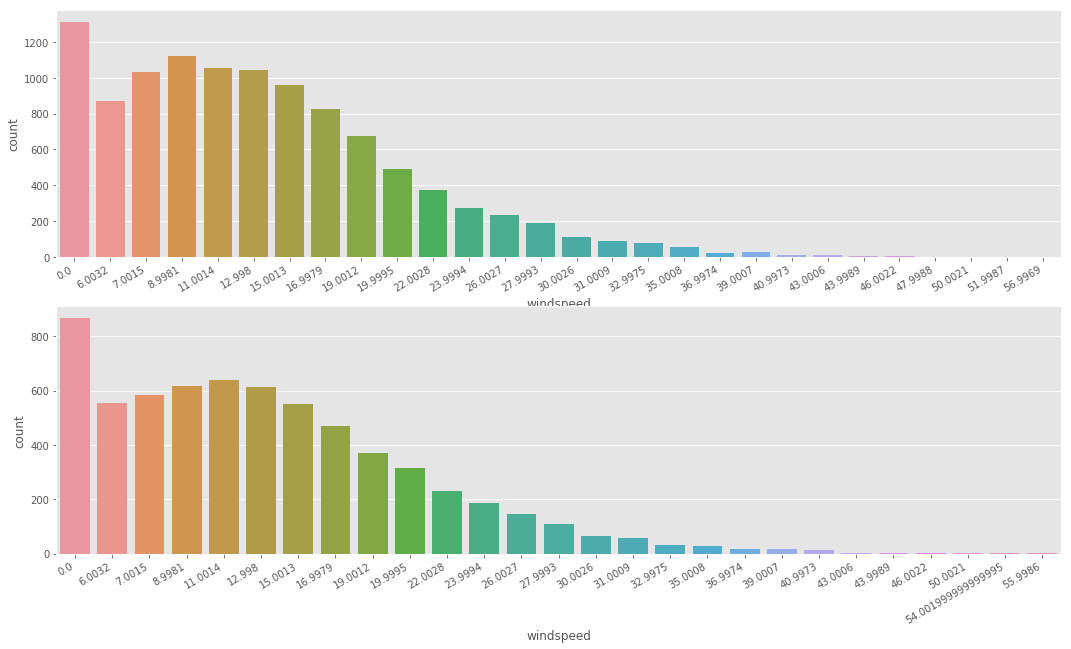

In [23]:
fig, axes = plt.subplots(nrows = 2)
fig.set_size_inches(18, 10)
for i, dataset in enumerate(train_test_data):
    plt.sca(axes[i])
    plt.xticks(rotation = 30, ha = "right")
    sns.countplot(data = dataset, x = "windspeed", ax = axes[i])
plt.show()

In [24]:
trainWind0 = train.loc[train["windspeed"] == 0]
trainWindNot0 = train.loc[train["windspeed"] != 0]

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
def predict_windspeed(data):
    dataWind0 = data.loc[data["windspeed"] == 0]
    dataWindNot0 = data.loc[data["windspeed"] != 0]
    
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
    
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype(str)
    
    rfModel_wind = RandomForestClassifier()
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])
    
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0["windspeed"] = wind0Values
    
    data = predictWindNot0.append(predictWind0)
    data["windspeed"] = data["windspeed"].astype(float)
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
    
    return data

In [27]:
train = predict_windspeed(train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


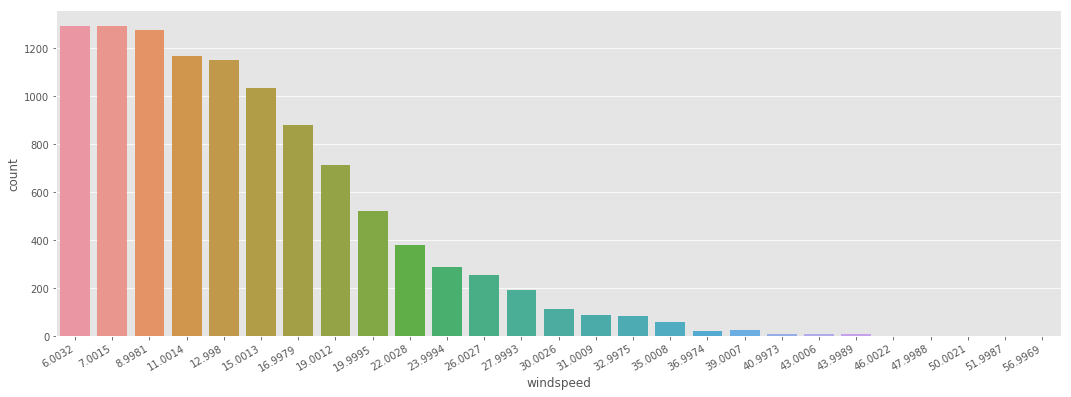

In [28]:
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 6)
plt.xticks(rotation = 30, ha = "right")
sns.countplot(data = train, x = "windspeed", ax = ax1);

In [29]:
categorical_feature_names = ["season", "holiday", "workingday", "weather", "dayofweek", "month", "year", "hour"]

for val in categorical_feature_names:
    train[val] = train[val].astype("category")
    test[val] = test[val].astype("category")

In [30]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed", "year", "hour", "dayofweek", "holiday", "workingday"]

In [31]:
X_train = train[feature_names]
X_train.head()

,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [32]:
X_test = test[feature_names]
X_test.head()

,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [33]:
y_train = train["count"]
y_train.head()

0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

# 평가지표 RMSLE(Root Mean Squared Logarithmic Error)
$$ \sqrt{\frac 1 n \sum_{i = 1}^{n}{(log({p_i + 1}) - log({a_i + 1}))^2}}$$

In [34]:
def rmsle(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    difference = (log_predict - log_actual) ** 2
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

In [35]:
from sklearn.metrics import make_scorer

In [36]:
rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [37]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [39]:
score = cross_val_score(model, X_train, y_train, cv = k_fold, scoring=rmsle_scorer)
score = score.mean()
print("Score = {:.5f}".format(score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Score = 0.34416


In [40]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
predictions = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5, 1.0, 'test')]

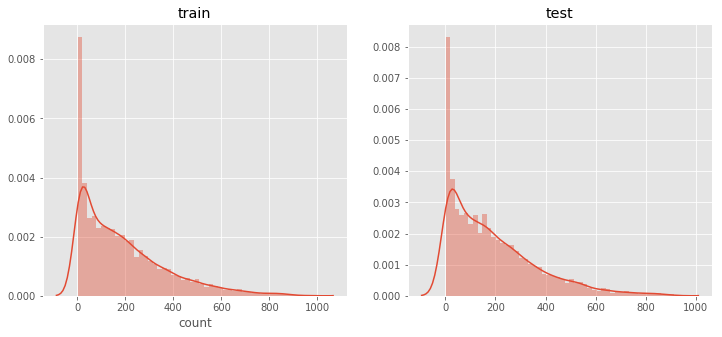

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sns.distplot(y_train, ax = ax1, bins = 50)
ax1.set(title = "train")
sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = "test")

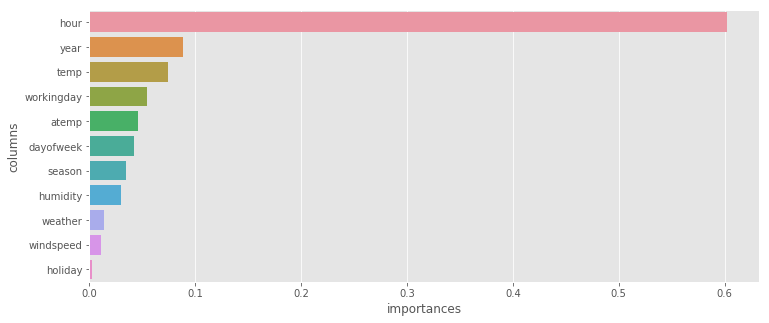

In [45]:
df = pd.DataFrame({"columns" : X_train.columns, "importances" : model.feature_importances_}).sort_values(by = "importances", ascending = False)
fig = plt.figure(figsize=(12, 5))
sns.barplot(data = df, x = "importances", y = "columns", orient = "h")
plt.show()

In [43]:
submission = pd.DataFrame({"datetime" : test["datetime"], "count" : predictions})
submission.head()

,datetime,count
0,2011-01-20 00:00:00,10.4
1,2011-01-20 01:00:00,5.0
2,2011-01-20 02:00:00,3.6
3,2011-01-20 03:00:00,3.7
4,2011-01-20 04:00:00,3.0


In [44]:
submission.to_csv("submission_bike.csv", index = False)